In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = pd.read_csv('../input/heart.csv')

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


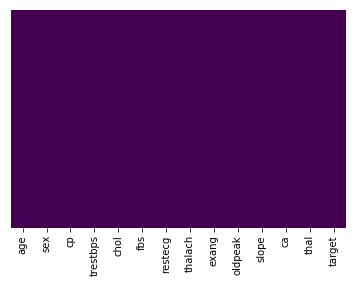

In [4]:
sns.heatmap(ds.isnull(), yticklabels = False, cbar=False, cmap='viridis')

In [5]:
ds.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
sns.set_style('whitegrid')

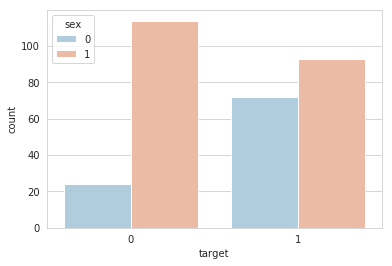

In [7]:
sns.countplot(x='target', hue='sex', data=ds, palette='RdBu_r')

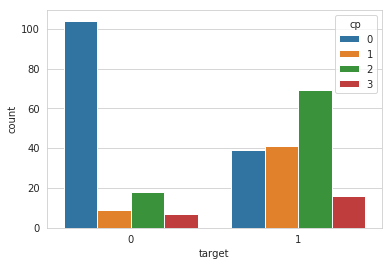

In [8]:
sns.countplot(x='target', hue='cp', data=ds)

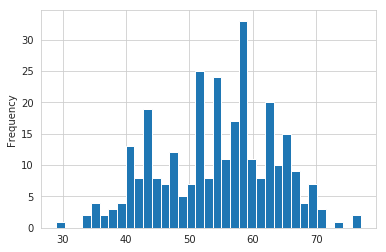

In [9]:
ds['age'].plot.hist(bins=35)

In [10]:
ds.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


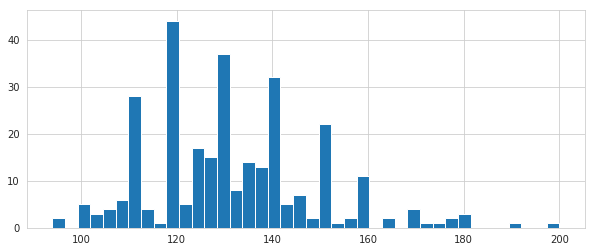

In [11]:
ds['trestbps'].hist(bins=40, figsize=(10, 4))

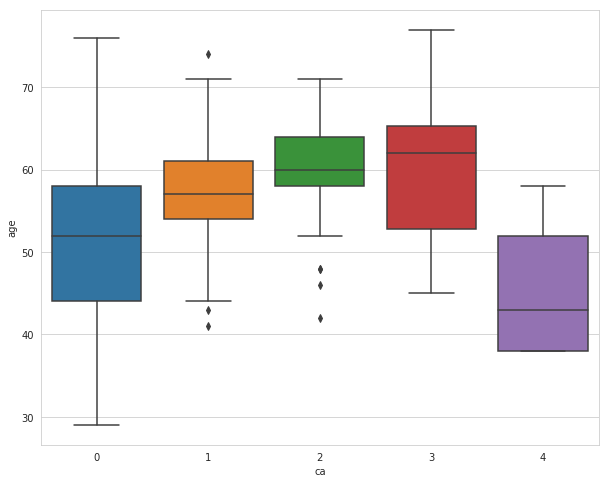

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='ca', y='age', data=ds)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
ds.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
y = ds.iloc[:, 13].values.reshape(-1, 1)
X = ds.iloc[:, 0:13].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [18]:
# Logistic Regression

In [19]:
model_forScaledFeatures = LogisticRegression()
model_forScaledFeatures.fit(X_train, y_train)
y_pred_forscaledfeatures = model_forScaledFeatures.predict(X_test)
print(classification_report(y_test, y_pred_forscaledfeatures))
print('\n')
print(confusion_matrix(y_test, y_pred_forscaledfeatures))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

   micro avg       0.83      0.83      0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



[[24  9]
 [ 4 39]]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# K-Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
#Elbow method
error_rate = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

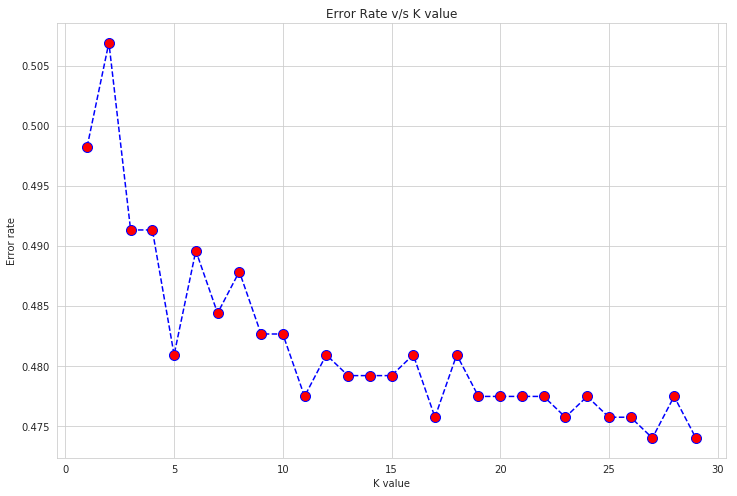

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate v/s K value')
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.show()

In [24]:
classifier_knn = KNeighborsClassifier(n_neighbors=11, metric='minkowski', p=2)

In [25]:
classifier_knn.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [26]:
ypred_from_knn = classifier_knn.predict(X_test)

In [27]:
print(classification_report(y_test, ypred_from_knn))
print('\n')
print(confusion_matrix(y_test, ypred_from_knn))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79        33
           1       0.80      0.95      0.87        43

   micro avg       0.84      0.84      0.84        76
   macro avg       0.86      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76



[[23 10]
 [ 2 41]]


In [28]:
#SVM 

In [29]:
from sklearn.svm import SVC

In [30]:
model_SVC = SVC(kernel='linear', random_state=0)
model_SVC.fit(X_train, y_train)
ypred_from_svc = model_SVC.predict(X_test)
print(classification_report(y_test, ypred_from_svc))
print('\n')
print(confusion_matrix( y_test, ypred_from_svc))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.82      0.95      0.88        43

   micro avg       0.86      0.86      0.86        76
   macro avg       0.87      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



[[24  9]
 [ 2 41]]


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
#Kernel SVM (Gaussian Kernel)

In [32]:
model_SVM_Kernel = SVC(kernel='rbf', random_state=0)
model_SVM_Kernel.fit(X_train, y_train)
ypred_from_SVMKernel = model_SVM_Kernel.predict(X_test)
print(classification_report(y_test, ypred_from_SVMKernel))
print('\n')
print(confusion_matrix( y_test, ypred_from_SVMKernel))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

   micro avg       0.86      0.86      0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



[[25  8]
 [ 3 40]]


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
#Decision-Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
ypred_from_tree = model_tree.predict(X_test)
print(classification_report(y_test, ypred_from_tree))
print('\n')
print(confusion_matrix( y_test, ypred_from_tree))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        33
           1       0.82      0.84      0.83        43

   micro avg       0.80      0.80      0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



[[25  8]
 [ 7 36]]


In [36]:
#Random-Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model_randomtree = RandomForestClassifier(n_estimators=200)
model_randomtree.fit(X_train, y_train)
ypred_from_randomtree = model_randomtree.predict(X_test)
print(classification_report(y_test, ypred_from_randomtree))
print('\n')
print(confusion_matrix( y_test, ypred_from_randomtree))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

   micro avg       0.83      0.83      0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



[[24  9]
 [ 4 39]]
